In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "f2a2d5f8e3e39ff0829bcca2e60f5ead"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [6]:
# OpenWeatherMap API Key
weather_api_key = "f2a2d5f8e3e39ff0829bcca2e60f5ead"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Set print statements
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=jamestown
Processing Record 2 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=nikolskoye
Processing Record 3 | Lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=lethem
Processing Record 4 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=rikitea
Processing Record 5 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=quatre cocos
Processing Record 6 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=ushuaia
Processing Record 7 | Saint George
http://api.openweathermap.org/data/2.5/weath

Processing Record 57 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=atuona
Processing Record 58 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=pitimbu
Processing Record 59 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=grindavik
Processing Record 60 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=butaritari
Processing Record 61 | Istok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=istok
Processing Record 62 | Rengo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=rengo
Processing Record 63 | Carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=carballo
Proc

Processing Record 113 | Mponela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=mponela
Processing Record 114 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=saint-pierre
Processing Record 115 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=soyo
Processing Record 116 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=bluff
Processing Record 117 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=victoria
Processing Record 118 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=dingle
Processing Record 119 | São Francisco de Paula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e6

Processing Record 169 | Sanmenxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=sanmenxia
Processing Record 170 | Lasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=lasem
Processing Record 171 | Puerto Maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=puerto maldonado
Processing Record 172 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=tiksi
Processing Record 173 | Challapata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=challapata
Processing Record 174 | Blankenberge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=blankenberge
Processing Record 175 | Horasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e3

Processing Record 224 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=port hedland
Processing Record 225 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=hofn
Processing Record 226 | Yarensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=yarensk
Processing Record 227 | Niigata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=niigata
Processing Record 228 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=buchanan
Processing Record 229 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=dubbo
Processing Record 230 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=sitka
C

City not found. Skipping...
Processing Record 280 | Ruteng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=ruteng
Processing Record 281 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=christchurch
Processing Record 282 | Formosa do Rio Preto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=formosa do rio preto
Processing Record 283 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=longyearbyen
Processing Record 284 | Mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=mana
Processing Record 285 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=solnechnyy
Processing Record 286 | Severo-Kuril'sk
http://api.openweathermap.org/

Processing Record 336 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=namatanai
Processing Record 337 | Santa Cruz del Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=santa cruz del sur
Processing Record 338 | Boundiali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=boundiali
Processing Record 339 | Nouakchott
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=nouakchott
Processing Record 340 | Tigil'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=tigil
Processing Record 341 | Dalby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=dalby
Processing Record 342 | San Quintín
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e

Processing Record 392 | Lagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=kaspiyskiy
Processing Record 393 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=high level
Processing Record 394 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=kulhudhuffushi
Processing Record 395 | Novobiryusinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=novobiryusinskiy
Processing Record 396 | Puerto Nariño
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=puerto narino
Processing Record 397 | Zaraza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=zaraza
Processing Record 398 | Kharan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 448 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=mount isa
Processing Record 449 | Neuquén
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=neuquen
Processing Record 450 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=half moon bay
Processing Record 451 | Tomatlán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=tomatlan
Processing Record 452 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=shimoda
Processing Record 453 | Gladbeck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=gladbeck
Processing Record 454 | Sakaraha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bc

Processing Record 504 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=flinders
Processing Record 505 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=iquitos
Processing Record 506 | Kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=kodinsk
Processing Record 507 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=te anau
Processing Record 508 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=ola
Processing Record 509 | Tunceli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=tunceli
City not found. Skipping...
Processing Record 510 | Mardin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bc

Processing Record 560 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=mandalgovi
Processing Record 561 | San Francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=san francisco
Processing Record 562 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=tura
Processing Record 563 | Aras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=aras
Processing Record 564 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=lavrentiya
Processing Record 565 | Khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2a2d5f8e3e39ff0829bcca2e60f5ead&q=khasan


In [8]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [11]:
# Save dataframe to a CSV file
weather_data.to_csv('city_weather_data.csv')

# Display dataframe head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,75,US,1586562831,59,42.10,-79.24,37.99,19.46
1,Nikolskoye,75,RU,1586563077,95,59.70,30.79,33.01,4.47
2,Lethem,89,GY,1586563078,62,3.38,-59.80,84.38,10.76
3,Rikitea,86,PF,1586563079,74,-23.12,-134.97,77.43,7.40
4,Quatre Cocos,40,MU,1586563080,78,-20.21,57.76,78.80,11.41


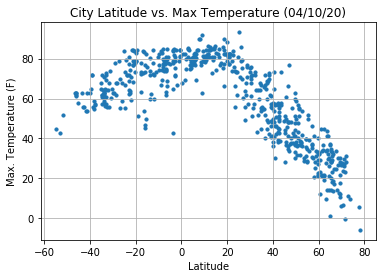

In [20]:
# Create a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Label the other graph properties
plt.title("City Latitude vs. Max Temperature (04/10/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot-Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

This plot is showing the data points for city latitude and maximum temperature to show if there is a noticeable relationship visually. 

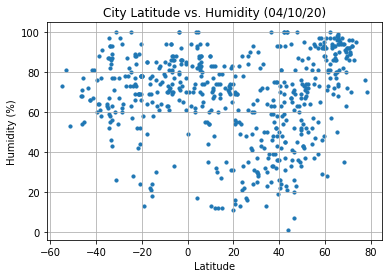

In [21]:
# Create a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Label the other graph properties
plt.title("City Latitude vs. Humidity (04/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot-Humidity_vs_Latitude.png")

# Show plot
plt.show()

This plot is showing the data points for city latitude and humidity to show if there is a noticeable relationship visually. 

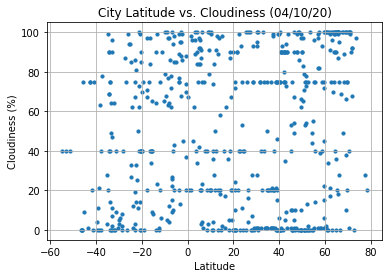

In [22]:
# Create a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Label the other graph properties
plt.title("City Latitude vs. Cloudiness (04/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot-Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

This plot is showing the data points for city latitude and cloudiness to show if there is a noticeable relationship visually. 

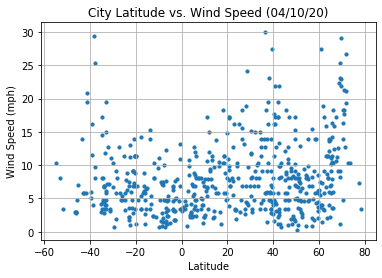

In [23]:
# Create a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Label the other graph properties
plt.title("City Latitude vs. Wind Speed (04/10/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plot-Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

This plot is showing the data points for city latitude and wind speed to show if there is a noticeable relationship visually. 

In [100]:
# Create Northern and Southern Hemisphere DataFrames
# Store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = weather_data.Lat >= 0
crit_south = weather_data.Lat < 0

# Create the northern and southern hemisphere dataframes using boolean indexing from the criteria from above 
northern_weather = weather_data[crit_north]
southern_weather = weather_data[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
northern_weather = northern_weather.reset_index(drop=True)
southern_weather = southern_weather.reset_index(drop=True)


R squared: 0.8324875998094972


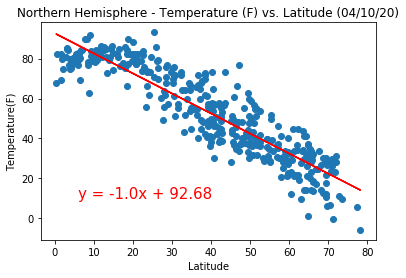

In [101]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = northern_weather['Lat'].astype('float')
y_values = northern_weather['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.352755405136061


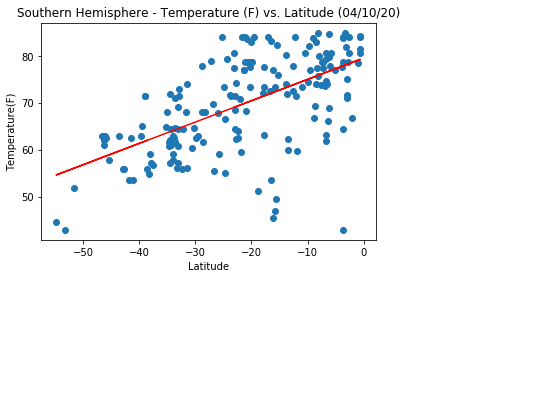

In [102]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = southern_weather['Lat'].astype('float')
y_values = southern_weather['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In the northern hemisphere plot there is a strong positive correlation between temperature and latitude as denoted by the r-squared value of 0.83. In the southern hemisphere plot there is a weak positive correlation between temperature and latitude as denoted by the r-squared value of 0.35. 

R squared: 0.0626371239846368


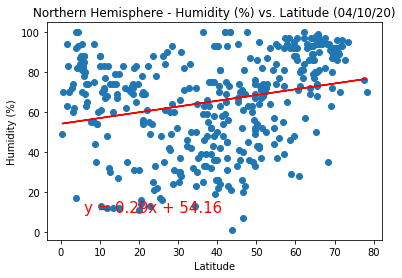

In [106]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = northern_weather['Lat'].astype('float')
y_values = northern_weather['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.013853196349872718


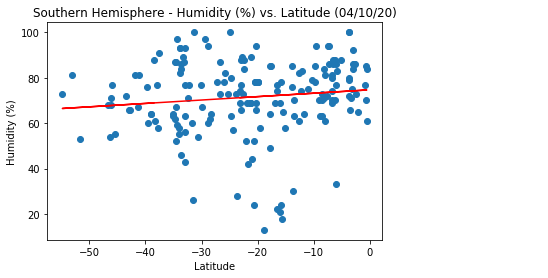

In [105]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = southern_weather['Lat'].astype('float')
y_values = southern_weather['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In the northern hemisphere plot there is a very weak positive correlation between humidity and latitude as denoted by the r-squared value of 0.062. In the southern hemisphere plot there is a very weak positive correlation between humidity and latitude as denoted by the r-squared value of 0.13. 

R squared: 0.016577594638102204


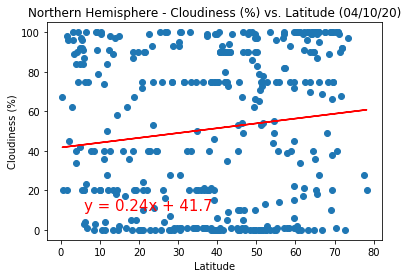

In [107]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = northern_weather['Lat'].astype('float')
y_values = northern_weather['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.10275084691073175


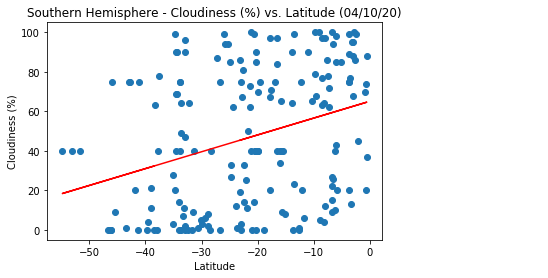

In [108]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = southern_weather['Lat'].astype('float')
y_values = southern_weather['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In the northern hemisphere plot there is a very weak positive correlation between cloudiness and latitude as denoted by the r-squared value of 0.0165. In the southern hemisphere plot there is a very weak positive correlation between cloudiness and latitude as denoted by the r-squared value of 0.102. 

R squared: 0.046195185484911416


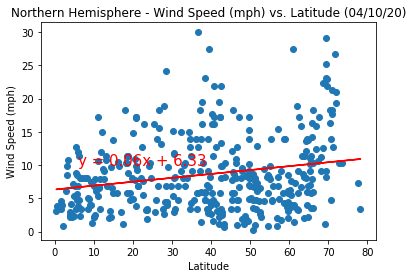

In [109]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = northern_weather['Lat'].astype('float')
y_values = northern_weather['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.06970129423874953


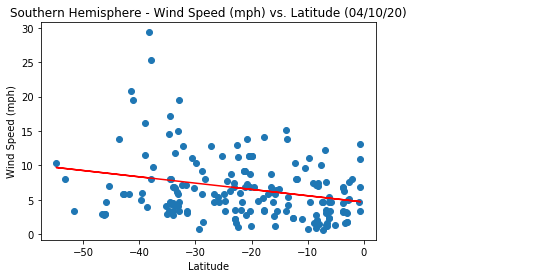

In [110]:
# Convert to floats and store latitude and maximum temperature as x and y values
x_values = southern_weather['Lat'].astype('float')
y_values = southern_weather['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude (04/10/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In the northern hemisphere plot there is a very weak positive correlation between wind speed and latitude as denoted by the r-squared value of 0.046. In the southern hemisphere plot there is a very weak positive correlation between wind speed and latitude as denoted by the r-squared value of 0.069. 